Life Time Value 'LTV' is the total worth of a customer to a business over the entire duration of their relationship. It is an important metric as it costs less to keep existing customers than it does to acquire new ones; so, increasing the value of your existing customers is an excellent way to drive growth.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [2]:
conn= sqlite3.connect('churn.db')

df= pd.read_sql("select * from churn_all", conn)

In [3]:
# read the table as dataframe 
df= pd.read_sql('select * from churn_all', conn)

In [4]:
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.5,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.3,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   State             7043 non-null   object 
 6   Latitude          7043 non-null   float64
 7   Longitude         7043 non-null   float64
 8   ZipCode           7043 non-null   int64  
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


df.isna().sum()
sns.barplot(x= 'Tenure', y= 'TotalCharges', data= df)

#### What is ratio of Churned customers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

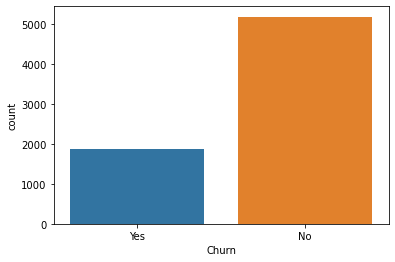

In [6]:
df.Churn.value_counts()
sns.countplot(df.Churn)
# So not Churned : 5000, Churned: 1800

In [12]:
df.Tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: Tenure, Length: 73, dtype: int64

#### Basic information about Churning Customers

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

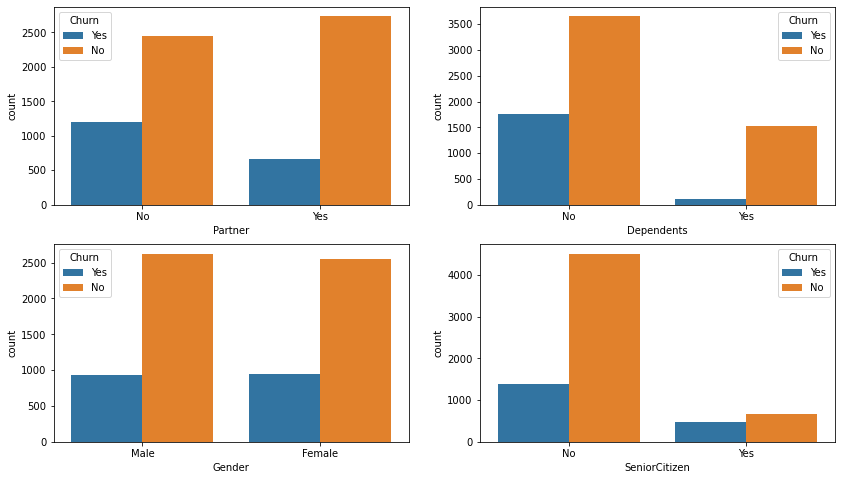

In [70]:
# GEnder, SeniorCitzen, Partner, Dependents details of Churning Customers
#sns.plot(x= df.Gender, y= df.SeniorCitizen, hue= df.Dependents)

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.countplot(x= df.Partner, hue= df.Churn)
plt.subplot(2,2,2)
sns.countplot(x= df.Dependents, hue= df.Churn)
plt.subplot(2,2,3)
sns.countplot(x= df.Gender, hue= df.Churn)
plt.subplot(2,2,4)
sns.countplot(x= df.SeniorCitizen, hue= df.Churn)


In [36]:
df.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

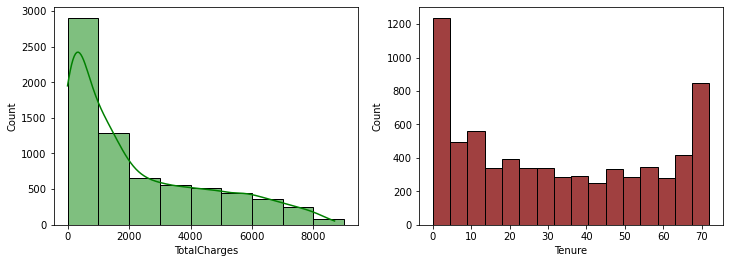

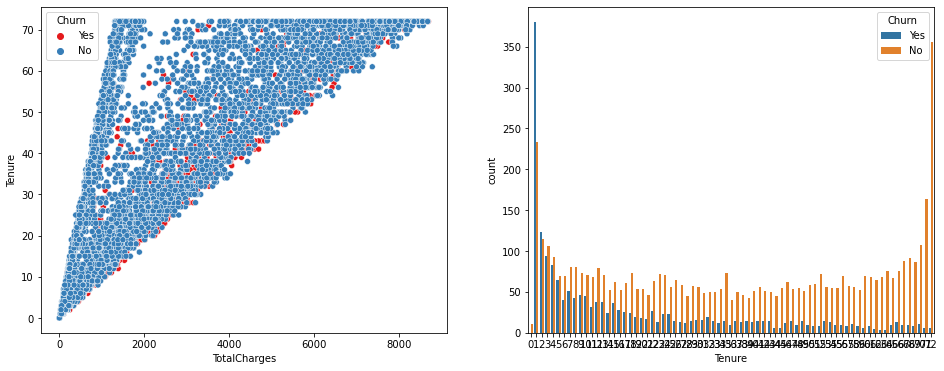

In [32]:
plt.figure(figsize= (12,4))
plt.subplot(1,2,1)
sns.histplot(df.TotalCharges,color= 'green', binwidth= (1000),kde= True)
plt.subplot(1,2,2)
sns.histplot(df.Tenure, color= 'maroon')

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(x= df.TotalCharges, y= df.Tenure, hue= df.Churn,palette= 'Set1')
plt.subplot(1,2,2)
sns.countplot(df.Tenure, hue= df.Churn)

1> Customers paying High TotalCharges are mostly of long Tenures(month).
2> Churning customers are more in less Tenures. 

#### Find relation between churn and TotalCharges
but TotalCharges is string dtype so converting datatype

In [9]:
df.isnull().sum() # No Nan values found 
df.loc[2234,'TotalCharges']      # but empty string found like ' '

df.Tenure.value_counts()
df.loc[df.Tenure == ' ',:]
df.Tenure.dtypes

dtype('int64')

In [4]:
df.TotalCharges.replace(' ','0',inplace= True)    # replacing ' ' with zero

# Now converting datatype ot numeric 
df.TotalCharges= pd.to_numeric(df.TotalCharges)

#### What was avg LTV of Churned customers? How long did they stay?

In [19]:
# Extract dataframe for only Churned Customrs
churn_df= pd.read_sql('select * from churn_all where Churn = "Yes"', conn)
churn_df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.5,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.3,Yes


Total revenue by a customer paid: MonthlyCharges * Tenure , But sometimes customers change services so, TotalCharges sometimes changes.

In [20]:
# Converting TotalCharges to numeric
churn_df.TotalCharges.replace(' ','0',inplace= True)    # replacing ' ' with zero

# Now converting datatype ot numeric 
churn_df.TotalCharges= pd.to_numeric(churn_df.TotalCharges)

In [21]:
churn_df['TotalCharges'].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

We see from churn_df that,Out of all Churned customers around 20% of customers are Paying the 80% of Revenue.

In [18]:
import numpy as np

In [33]:
# Let's find max TotalCharges of 80 percentile customers
np.quantile(churn_df.TotalCharges, 0.80)

2840.4100000000003

Dividing data into 80% people based TotalCharges bcaz there are two groups: 

Less TotalCharges( <2840) lowvalue_Customers -> (below 80%) 

More TotalCharges( >2840) highvalue_Customers -> (above 80%)

In [37]:
# Using sql query
# customers with more Total charges
pd.read_sql('select * from churn_all where TotalCharges > "2840"', conn).head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.5,Yes
1,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
2,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.3,Yes


In [65]:
# customers with less Total charges
pd.read_sql('select * from churn_all where TotalCharges < "2840" and Churn = "Yes" ', conn).head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,1066-JKSGK,Male,No,No,No,California,34.066303,-118.435479,90024,Yes,...,No internet service,No internet service,No internet service,1,Month-to-month,Mailed check,No,20.15,20.15,Yes


In [41]:
# Let's make separate dataframe of CHURNED customers as High value cust. &  Low value cust.
high_value_customers= churn_df.query('TotalCharges > 2840')

low_value_customers= churn_df.query('TotalCharges < 2840')

count    1495.000000
mean      711.265819
std       766.848197
min        18.850000
25%        85.025000
50%       371.650000
75%      1128.225000
max      2839.650000
Name: TotalCharges, dtype: float64


<AxesSubplot:ylabel='Density'>

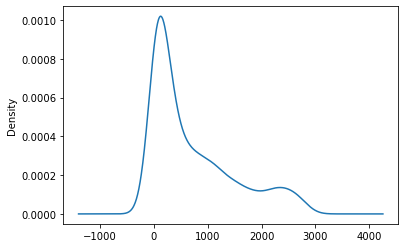

In [50]:
# Let's show distribution 
print(low_value_customers.TotalCharges.describe())
low_value_customers.TotalCharges.plot(kind= 'kde')

So in low low_value_customers i.e 80 %ile of Customers, most customers have TotalCharges less than 500.
- Mean 711 (but max 2840)
- Highly positive skewed..

count     374.000000
mean     4811.723262
std      1436.724288
min      2841.550000
25%      3522.462500
50%      4571.100000
75%      5891.212500
max      8684.800000
Name: TotalCharges, dtype: float64


<AxesSubplot:ylabel='Density'>

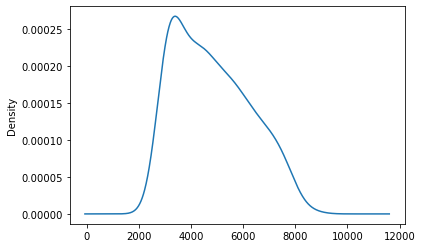

In [49]:
print(high_value_customers.TotalCharges.describe())
high_value_customers.TotalCharges.plot(kind= 'kde')

Almost Normal distribution curve
- Mean(4800) max(8600)

count    1495.000000
mean        9.935117
std        10.742349
min         1.000000
25%         1.000000
50%         6.000000
75%        15.000000
max        61.000000
Name: Tenure, dtype: float64


<AxesSubplot:ylabel='Frequency'>

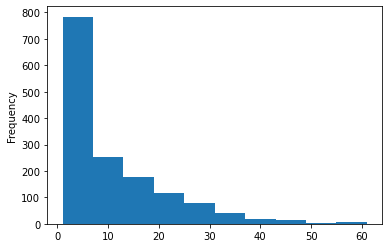

In [71]:
# Show Distribution Tenure feature corresponding low_value_customer/high_value_customers

print(low_value_customers.Tenure.describe()) 
low_value_customers.Tenure.plot(kind= 'hist')

count    374.000000
mean      50.133690
std       12.334841
min       27.000000
25%       40.000000
50%       49.500000
75%       60.000000
max       72.000000
Name: Tenure, dtype: float64


<AxesSubplot:ylabel='Frequency'>

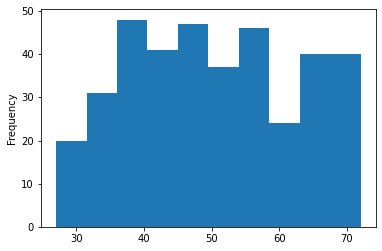

In [72]:
print(high_value_customers.Tenure.describe()) 
high_value_customers.Tenure.plot(kind= 'hist')

From above we conclude:

Average LTV of low_value_customers is $711 and their avg. Tenure to stay is around 9 Months.

Average LTV of high_value_customers is $4800 and their avg. Tenure to stay is around 50 Months.

we can conclude that the customers in the top 20% have a much higher tenure and that is the reason for their high lifetime value (LTV). Once again, this suggests that we should focus on serving those 20% customers, who have high LTVs.So to prevent Churning it is Suggested to have Long Tenure Customers as they are less likely to churn.